## **1. Importing Data Set**

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Import DataSet
data=pd.read_csv('D:/ToDo_Internship/CodSoft/Task01/Data/tested.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **1.1 Features and Output Extraction**

#### **1.11 Data Cleaning**

In [110]:
# Drop irrelevant columns
data = data.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

# Fill missing values with the median (for numerical columns)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Fare"].fillna(data["Fare"].median(), inplace=True)

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])

#### **1.12 Feature Extraction**

In [111]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

### **1.2 Split Data-20/80 Ratio**

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **1.3 Build and Train The Model**

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=2, n_estimators=100)

In [114]:
model = rf.fit(X_train, y_train)

## **2. Check the Model**  

### **2.1 Accuracy Print**

In [115]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


#### **2.11 Calculating F1-Scores**

In [116]:
from sklearn.metrics import f1_score
# Calculate the F1 score
macro =f1_score(y_pred, y_test, average='macro')
micro =f1_score(y_pred, y_test, average='micro')
weighted =f1_score(y_pred, y_test, average='weighted')

#### **2.12 Printing F1-Scores**

In [117]:
print(f"F1-Score(Macro) = {macro*100:.2f} %")
print(f"F1-Score(Micro) = {micro*100:.2f}%")
print(f"F1-Score(Weighted) = {weighted*100:.2f}%")

F1-Score(Macro) = 100.00 %
F1-Score(Micro) = 100.00%
F1-Score(Weighted) = 100.00%


### **2.2 Visulaizing Data**

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

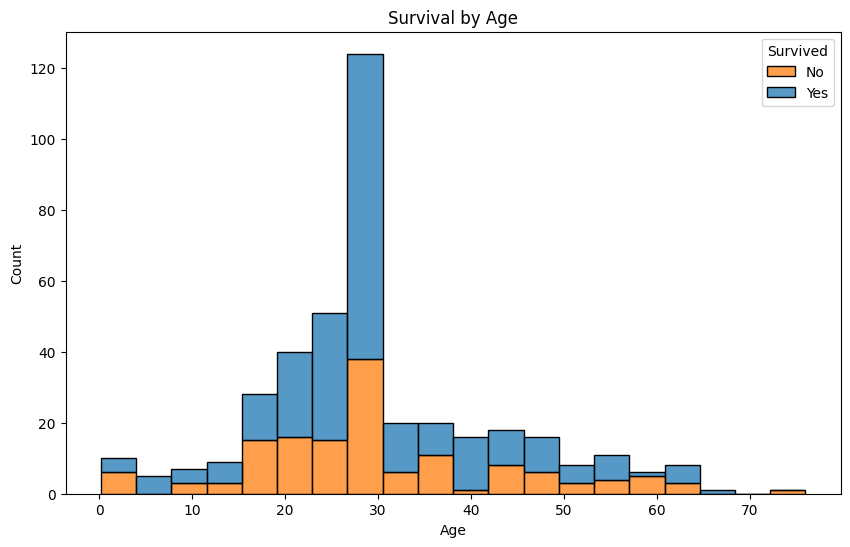

In [119]:
# Visualize survival by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

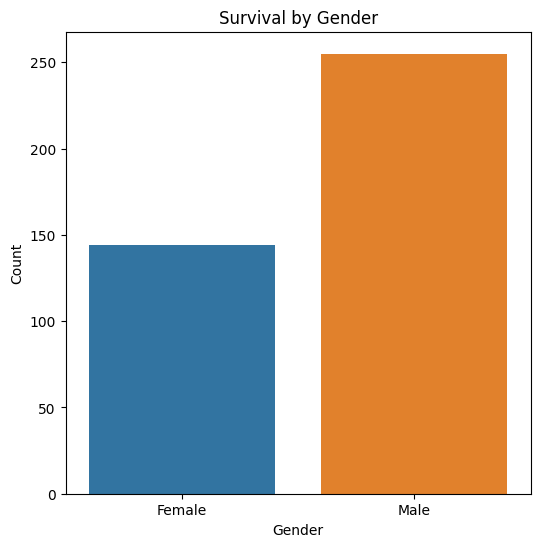

In [120]:
# Grouped bar plot for survival by gender
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Sex')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Female", "Male"])
plt.show()


#           **Implementing The Model on the Unseen Data**

## **3. Save the Model with Pickle**

In [121]:
import pickle

with open('model_call', 'wb') as f:
    pickle.dump(model,f)

### **3.1 Importing the Cross Validation Data(Unseen Data)**

In [122]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
import pandas as pd
data_rand=pd.read_csv('D:/ToDo_Internship/CodSoft/Task01/Data/CrossValidation.csv')
data_rand.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q
1,1292,1,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
2,1293,0,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
3,1294,1,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
4,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S


### **3.2 Extracting Features and Output**

#### **3.21 Data Cleaning and Sorting**

In [123]:
# Drop irrelevant columns
data_rand = data_rand.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)

# Fill missing values with the median (for numerical columns)
data_rand["Age"].fillna(data_rand["Age"].median(), inplace=True)
data_rand["Fare"].fillna(data_rand["Fare"].median(), inplace=True)

# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
data_rand["Sex"] = le.fit_transform(data_rand["Sex"])

#### **3.22 Features and Output**

In [124]:
X_rand = data_rand.drop("Survived", axis=1)
y_rand = data_rand["Survived"]

### **3.3 Implement The Model**

In [125]:
import pickle

with open('model_call', 'rb') as f:
    mod= pickle.load(f)

Y_new = mod.predict(X_rand)

### **3.4 F1-Scores**

#### **3.41 Calculation**

In [126]:
from sklearn.metrics import f1_score
# Calculate the F1 score
macro =f1_score(Y_new, y_rand , average='macro')
micro =f1_score(Y_new, y_rand , average='micro')
weighted =f1_score(Y_new, y_rand , average='weighted')

#### **3.42 Printing**

In [127]:
print(f"F1-Score(Macro) = {macro*100:.2f} %")
print(f"F1-Score(Micro) = {micro*100:.2f}%")
print(f"F1-Score(Weighted) = {weighted*100:.2f}%")

F1-Score(Macro) = 100.00 %
F1-Score(Micro) = 100.00%
F1-Score(Weighted) = 100.00%


### **3.5 Accuracy**

In [128]:
accuracy = accuracy_score(Y_new, y_rand )
print(f"Accuracy = {accuracy*100:.2f}%")

Accuracy = 100.00%
